In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Generalization Error

In [16]:
dvc = 10
delta = 0.05
N = 460000
eps = math.sqrt((8.0/N)*((dvc*math.log(2.0*N))-math.log(delta/4.0)))
print ('When N is:', N, ', eps is:',eps)

When N is: 460000 , eps is: 0.04964277890917068


In [28]:
#OG VC
def vc_eps(delta, N, dvc):
    return math.sqrt((8.0/N)*((dvc*math.log(2.0*N))-math.log(delta/4.0)))
def vc_mapper(N):
    return vc_eps(0.05, N, 50)
vc_vec = np.vectorize(vc_mapper)

In [29]:
#rademccherPB
def rademacher_eps(delta, N, dvc):
    cur_eps = math.sqrt((2.0/N)*(math.log(2.0*N)+(dvc*math.log(N)))) + math.sqrt((2.0/N) * math.log(1.0/delta)) + (1.0/N)
    return cur_eps
def rademacher_mapper(N):
    return rademacher_eps(0.05, N, 50)
rademacher_vec = np.vectorize(rademacher_mapper)
eps_range = np.arange(0.0,10, 0.0001)

In [30]:
#Parrondo
def parrondo_eps(delta, N, dvc):
    last_true = False
    last_eps = eps_range[0]
    for cur_eps in eps_range:
        cur_rightside = (1.0/N) * ((2.0*cur_eps) + math.log(6.0/delta) + (dvc*math.log(2.0*N)))
        cur_rightside = math.sqrt(cur_rightside)
        cur_true = cur_eps <= cur_rightside
        if cur_true == False and last_true == True:
            break
        elif cur_true == True:
            last_true = True
            last_eps = cur_eps
    return last_eps
def parrondo_mapper(N):
    return parrondo_eps(0.05, N, 50)
parrondo_vec = np.vectorize(parrondo_mapper)

In [31]:
#devroye
def devroye_eps(delta, N, dvc):
    last_true = False
    last_eps = eps_range[0]
    for cur_eps in eps_range:
        cur_rightside = (1.0/(2.0*N))*(((4.0*cur_eps)*(1.0+cur_eps)) + math.log(4.0/delta) + ((2.0*dvc)*math.log(N)))
        cur_rightside = math.sqrt(cur_rightside)
        cur_true = cur_eps <= cur_rightside
        if cur_true == False and last_true == True:
            break
        elif cur_true == True:
            last_true = True
            last_eps = cur_eps
    return last_eps
def devroye_mapper(N):
    return devroye_eps(0.05, N, 50)
devroye_vec = np.vectorize(devroye_mapper)

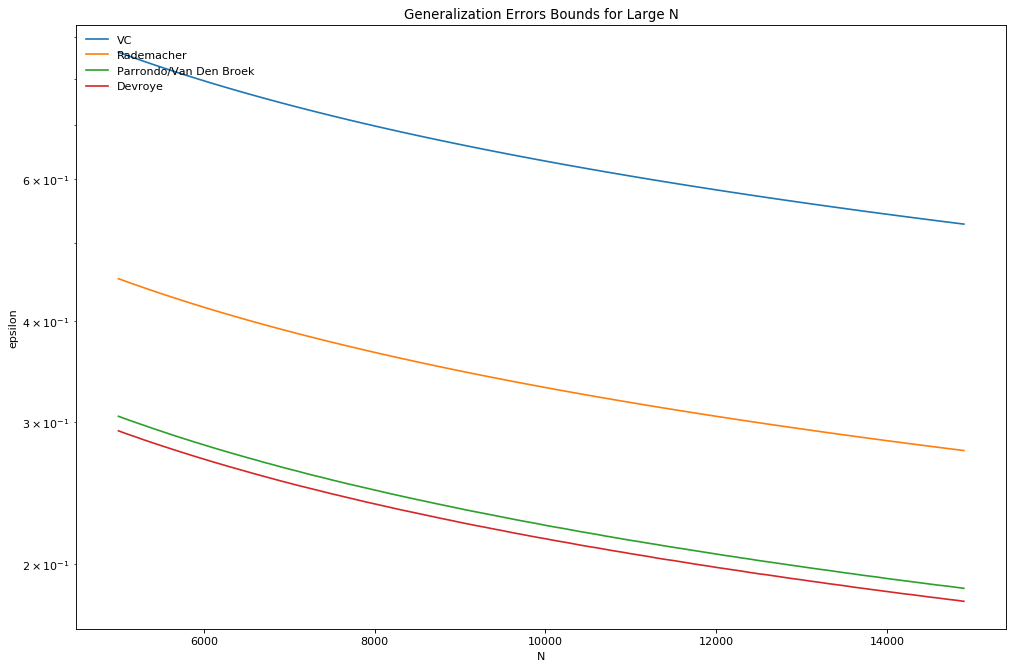

In [32]:
prob2 = {}
prob2["N"] = np.arange(5000,15000, 100)
prob2["vc"] = vc_vec(prob2["N"])
prob2["rad"] = rademacher_vec(prob2["N"])
prob2["par"] = parrondo_vec(prob2["N"])
prob2["dev"] = devroye_vec(prob2["N"])

prob2["plot"] = plt.figure(figsize=(15,10), dpi=80)
prob2["ax"] = prob2["plot"].add_subplot(111)
prob2["ax"].set_title("Generalization Errors Bounds for Large N")
prob2["ax"].set_xlabel("N")
prob2["ax"].set_ylabel("epsilon")
prob2["ax"].set_yscale("log", basey=10)


prob2["ax"].plot(prob2["N"], prob2["vc"], label="VC")
prob2["ax"].plot(prob2["N"], prob2["rad"], label="Rademacher")
prob2["ax"].plot(prob2["N"], prob2["par"], label="Parrondo/Van Den Broek")
prob2["ax"].plot(prob2["N"], prob2["dev"], label = "Devroye")

prob2["ax"].legend(loc='upper left', frameon=False)

plt.show()